# O-Lab Online Nuclear Laboratory

In [9]:
import json
import pathlib
import warnings

import altair as alt
import numpy as np
import pandas as pd

from pathlib import Path
from IPython.display import Code

In [3]:
from altair.vegalite.v4.display import html_renderer, svg_renderer


def many_mime_renderer(spec):
    bundle = {}
    metadata = {}
    bundle["text/plain"] = "<VegaLite 4 object>"
    bundle["application/vnd.vegalite.v4+json"] = spec
    bundle.update(html_renderer(spec))
    bundle.update(svg_renderer(spec))
    return bundle, metadata


alt.renderers.register("many_mime", many_mime_renderer)
alt.renderers.enable("many_mime");

(olab:motivations)=
## Motivations

The identification of the SARS-COV-2 virus in 2019 marked the onset of an unprecedented period of social and economic disruption across the global community. Its impact has been felt in the majority of countries around the world, both in terms of the real-terms consequences of wide-spread infection, and the subsequent public health interventions in pursuit of elimination or suppression. Within the domain of Higher Education, which places a particular importance upon in-person learning and interaction, the complex ongoing challenges associated with the COVID-19 pandemic have placed significant burden upon educators and their institutions.{cite:ps}`watermeyer_covid-19_2021`

At the University of Birmingham, a central aspect of the Nuclear Physics teaching provision is the availability of undergraduate laboratories. Over the course of the teaching semester, students enrolled in the appropriate modules are given the opportunity to learn the fundamentals of practical nuclear physics, including
- the principles which underpin the measurement of radiation, 
- the process of building and testing radiation experiments,
- practices and procedures involved in working with radioactive sources,
- the analytical techniques required to extract physics from laboratory measurements.

The specialised nature of the laboratory sessions in which these skills are taught imposes rigid constraints on the kinds of accommodations that can be made in light of University  public health measures e.g. occupancy limits, staffing availability, and ventilation requirements. Several experiments that undergraduates are expected to undertake include fundamentally immovable apparatus, such as a {math}`8\,\text{m}^3` graphite stack for neutron moderation, or a 150 L water bath used for neutron activation experiments.

Meanwhile, the detector equipment used to observe and measure incident radiation is typically fragile, bulky, and extremely expensive, such that undergraduates are not expected to move such equipment within the laboratory. The radioactive sources used within the various experiments are also controlled substances; requiring significant care during handling, preparatory safety training, and diligent monitoring to ensure that the sources are properly accounted for at all times. These factors conspire together such that conventional approaches to mitigating COVID-19 risks during the pandemic, such as the introduction of a "two meter rule", or reducing teaching group sizes, represent impractical solutions in the context of the nuclear laboratory.{cite:ps}`jones_two_2020`

Unlike other areas of the taught programmes such as taught lectures, in which provisions for distance learning (such as Panopto) were already in-use within the undergraduate teaching programs before the pandemic, no such solutions could be found to facilitate the development of practical laboratory skills in the domain of Nuclear Physics.{cite:ps}`jandric_teaching_2021` To address this challenge for the new and existing students impacted by the COVID-19 pandemic, an Online nuclear LABoratory (OLAB) was developed by a team of postgraduate nuclear physics students at the University of Birmingham. The objectives of this project were to implement an online learning resource which 
   - minimises the impact of digital inequality
   - scales to meet the demand of the existing and future student cohorts
   - provides an extensible platform upon which to develop new course material
   - integrates with the University E-Learning platform(s)
   - leverages existing, open-source technologies and
   - facilitates content-first development

## Virtual Laboratories

### Simplicity and Reproducibility

The provision of an online teaching resource for practical laboratory experience transcends the immediate problem of supporting distance-learning students during a public health emergency. Through a carefully defined environment, experiment designers can guide students towards successful application of learned theory, but also towards "interesting" or educational failure modes.{cite:ps}`de_jong_physical_2013-1` Due to the curated nature of the virtual environment, these failure modes can be introduced in accordance with the objectives of the laboratory; educators can _teach_ through failure in a controlled manner. Furthermore, by designing failure into an experiment, educators are given the ability to prepare in advance for adverse outcomes, and guide students through the experience. This is particular relevant in the event that experiment failures are irrecoverable, e.g. loss of experimental data, or damage to the electronics of a high-voltage power supply. Through the careful selection of a basis of representative failure modes, students can be better prepared for failures in a real-world experiment, which are often multifactorial and represent poor educational experiences.

Given the removal of the physical constraints associated with on-premise in-person teaching, online laboratory experiences are free to explore experiment designs that are infeasible or indeed impossible to realise in a conventional setting. Experiments can be simplified to eliminate confusing details such as cumbrous software, or simplify characteristics of the model such that the results are easier or more convenient to interpret e.g. increasing the rate of a decay process.{cite:ps}`de_jong_physical_2013-1` Furthermore, it is possible to treat physical invariants as model parameters that students can interact with e.g. the material properties of a radiation absorber. 

### Hybrid Learning
In addition to providing educators with greater freedoms over experimental outcomes and narrative towards deeper understanding of fundamental concepts, a significant benefit of virtual experiments is the improved efficiency associated with reduced setup time, and time-to-results. Nuclear physics experiments are typically constrained by the time required to configure the necessary detection equipment, and the subsequent interval over which the measurement must be gathered. In some cases, the time investment required to perform a measurement may serve as a lens through which to develop planning and reflection skills.{cite:ps}`de_jong_physical_2013-1` In the virtual laboratory, educators can choose whether to impose these restrictions. Where hybrid learning is possible, it may be favourable to distinguish between virtual and practical experiments through these real-world constraints in order to prioritise different learning outcomes. Equally, by preparing an experiment in the virtual space, students would have the opportunity to identify areas of concern ahead of time, and optimise their time in the physical laboratory e.g. determining ideal detector locations. It has been shown that hybrid approaches that combine in-person and virtual laboratories can improve learning outcomes with respect to either method in isolation.{cite:ps}`de_jong_physical_2013-1` 

For educators, the added flexibility of hybrid learning can also be beneficial; supervision of multiple groups of students is made more feasible by the elimination of spatial constraints associated with particular in-person demonstrations.{cite:ps}`post_effects_2019` In the event that physical/spatial resources are limited, such as equipment confined to particular laboratories with a finite capacity, virtual experiments can be used to increase the number of concurrent students that may engage with the session. Furthermore, demonstrators of virtual laboratories would not be required to undergo the same kinds of safety training that in-person demonstration necessitates. This follows from the improved health and safety risk-profile of distance learning.

## Accessibility and Student-Centred Learning

As noted in the introduction to this chapter, a significant motivation for the development of OLAB was provided by the need to support students engaging with distance learning as a consequence of University, domestic, or foreign policy. Outside of the pandemic control measures, the opportunity for students to revisit practical experiments in order to aid retention and understanding has been identified by students as a welcome consequence.{cite:ps}`aayiksoy_impact_2017` Remote labs can be used to extend the window of availability of an experiment outside the limits of contact time, which provides tangible benefits to part-time learners, or students who wish to revisit material at a later date in order to consolidate their learning. It is also noted that the flexibility to arrange their own learning process can give students a sense of ownership that correlates with increased motivation.{cite:ps}`post_effects_2019` 

Undergraduate laboratories typically imposes significant constraints on the teaching schedule due to the long sessions required to setup, measure, and restore the experimental equipment. This, in turn, places a higher cost on mistakes during these sessions, and prevents the students from repeating an experiment with the knowledge learned through failure. The ability to revisit experiments has been recognised by students as a positive aspect of virtual laboratories. Some students have also reported that the ability to work alone was a preferential mode of learning that was not possible in the physical laboratory due to equipment constraints.{cite:ps}`aayiksoy_impact_2017` Alongside this, research has shown that communication opportunities within virtual laboratories are highly correlated with student learning achievement; care must be taken by educators to ensure that these opportunities are established within the virtual space.{cite}`klein_studying_2021-1`


It should also be noted that hybrid virtual-practical laboratories offer the opportunity to increase accessibility and equity of learning provision, particularly in such cases where buildings or experiments cannot be readily made accessible. 

### Powerful Learning Tools 

The provision of a virtual laboratory offers the opportunity for educators to directly influence the kinds of software available to students on a per-course or even per-experiment basis. In particular, unlike practical laboratories in which the hardware often has a lifespan of many years (with the associated software lifespan), virtual laboratories may not be so far constrained in the software that students are required to use, and are better positioned to modify the tools that students are presented with on a needs basis. This is particularly relevant in the context of nuclear laboratories, in which the lifespan of the apparatus can span decades. 
Virtual laboratories are also well positioned to eliminate these kinds of "lock-in" issues. Within virtual experiments, educators may choose to provide interfaces that make it easier for students to analyse their acquired data. The elimination of this boundary between measurement and analysis is a contributing factor to reducing the "time to result" that distracts from learning outcomes. Whilst there is a recognisable place for teaching students the skills required to operate real hardware, virtual laboratories enable educators to determine when these skills are taught. 

The promise of virtual laboratories includes the ability to interleave hands-on experimental tasks with curated learning material. Outside of the virtual laboratory space, Massive Online Only Courses (MOOCs) are increasingly built around interactive notebooks, which employ the principles of computational narratives and interactive computing to build expressive and communicative resources that permit students to employ an explorative approach to their learning.{cite:ps}`granger_jupyter_2021` These tools show similar promise in the context of university education, where they are often already used to facilitate undergraduate programming classes. Developments in these tools offer the prospect for educators to interact with multiple remote students, providing a foundation for remote-first teaching. Students in virtual laboratories would arguably benefit from reusing the same tools that they are familiar with outside of the laboratory to reduce inertia.


## Design

The objectives outlined in {ref}`olab:motivations` can be partitioned into development-focused priorities and product-focused outcomes. Though members of the development team had varying degrees of experience in writing Physics analyses, the landscape of modern software development spans a significant number of software packages, programming languages, and domain-specific knowledge; a content-first, iterative approach to developing OLAB would be imperative. From these constraints, the following technological decisions were made:
:::{list-table}
:header-rows: 1

* - Software / Tool
  - Motivation
* - Python
  - Python is the fastest growing language in the physics research space, and is frequently used in data analytics and dashboarding contexts. The development group already had varying experience with the language, which is renowned for its quick time-to-first-result.
* - Jupyter Notebook
  - Jupyter Notebooks are widely used in academic research. There are already a significant number of software packages that add interactive widgets, and the notebook format serves as a standard across the Jupyter ecosystem.
* - JupyterHub
  - JupyterHub provides a battle-tested multi-tenant platform around which to serve customised computing environments to individual users. It provides hooks to integrate with LTI authentication systems such as those used by the Canvas LMS.
* - ROOT
  - ROOT is a standard tool used in the particle physics domain for all stages of the analysis lifecycle. 
* - ipywidgets
  - ipywidgets provides a well-tested suite of interactive widgets, which can easily be composed to build complex layouts.
* - Voilà
  - The Voilà server was used alongside jupyter-flex to present linear notebook documents as a customised user-friendly dashboard.
* - Kubernetes on GCP
  - To orchestrate the multi-tenant JupyterHub containers, Kubernetes was deployed on Google Cloud Platform.
:::

Further discussion of the merits and motivations behind this set of software packages is given later in this chapter.

As a first iteration of the online laboratory concept, a series of experiments were designed with close resemblance to their real-world counterparts. In addition to reducing the scope of the laboratory design, replicating on-premise experiments also offers the opportunity for students to prepare for practical in-situ experimentation, with an understanding of the real-world constraints. From this initial set of experiment proposals, a single candidate was chosen for a proof-of-concept: _characterisation of a NaI(Tl) scintillation detector_. 

## Engagement

In order to provision appropriate resources for the Kubernetes JupyterHub deployment such that costs could be minimised, a number of metrics were recorded. These data were then parsed from the Google Cloud Logging backend, and built into a dataset consisting of JSON records. Each record was built by correlating analytics events, e.g. the adjacent start and stop events for a particular user server. These records were then aggregated by notebook path (experiment name), time (concurrent users), and analysed to give indications towards usage trends. 

The produced JSON records consisted of two families: a notebook record (see {ref}`output:notebook-record`), and a server record (see {ref}`output:server-record`). Both records contain a user ID field which uniquely identifies the user to whom the record pertains. The notebook record includes information about the time that a notebook session started, stopped, and to which notebook the record corresponds. Meanwhile, the server record includes only the start and stop times of the server.

In [26]:
with Path("olab-analytics", "notebook-sessions", "record-000478f74b9ee8880306817566fde7b1.json").open() as f:
    code = json.dumps(json.load(f), indent=4)
Code(
    data=code, language="json"
)

{
    "user": "62a39aa76ab34147ef996f9f8f052dd663d67b38bf13c55e8ce6b911404b2e8e",
    "kernel_id": "a5f751d0-1650-480a-b5b6-3384f6f72c96",
    "start": 1605878281,
    "notebook": "index.ipynb",
    "stop": 1605878396
}

In [27]:
with Path("olab-analytics", "server-sessions", "record-00bea086d83b603db20e23b6ff80d616.json").open() as f:
    code = json.dumps(json.load(f), indent=4)
Code(
    data=code, language="json"
)

{
    "user": "5ac27e656c88c5cddd3ebe956b57819586541a810ffac363eab2906e0539d6db",
    "start": 1605711173,
    "start_delay": 2.231,
    "stop": 1605717001,
    "stop_delay": 6.851
}

### Users

In [3]:
data_dir = pathlib.Path("olab-analytics", "server-sessions")
sessions = [json.loads(p.read_text()) for p in data_dir.glob("*.json")]

df = pd.DataFrame(sessions)
df["start"] = pd.to_datetime(df["start"], unit="s")
df["stop"] = pd.to_datetime(df["stop"], unit="s")
df["duration_minutes"] = (df["stop"] - df["start"]).dt.total_seconds() / 60
df.head()

,user,start,start_delay,stop,stop_delay,duration_minutes
0,e27a0158e1f29881df5fd1456a6cf55bb779078dcd35e8...,2020-10-16 11:53:06,12.832,2020-10-16 12:00:38,3.090,7.533333
1,18235cdef66d459b116089e7c3157ee67d6add7eb0dee9...,2020-11-04 15:28:54,121.163,2020-11-04 16:24:31,11.523,55.616667
2,3cae9cc68ad2d596d9b8399777b5cb5ff649b124ee8270...,2020-10-21 11:56:47,17.360,2020-10-21 12:15:32,3.939,18.750000
3,e6e237eb13f404b0d2f57276001f57c9cf81bcaa60b707...,2020-12-14 09:32:14,120.652,2020-12-14 16:49:33,10.419,437.316667
4,18235cdef66d459b116089e7c3157ee67d6add7eb0dee9...,2020-11-26 09:38:51,2.815,2020-11-26 11:36:24,17.569,117.550000


The `start` time of each user server was downsampled to a granularity of days, and the distinct number of unique users per-day computed. A total of 66 unique users (including demonstrators) were identified in this dataset. See {ref}`table:olab-unique-users` for a subset of these records.

In [4]:
# Bind the start timestamp to the user, resample series to days, find the unique users per sample and reset
daily_active_users = pd.DataFrame(
    df.set_index("start")["user"].resample("D").nunique()
).reset_index()
daily_active_users

,start,user
0,2020-10-12,4
1,2020-10-13,1
2,2020-10-14,9
3,2020-10-15,7
4,2020-10-16,19
...,...,...
67,2020-12-18,1
68,2020-12-19,0
69,2020-12-20,0
70,2020-12-21,1


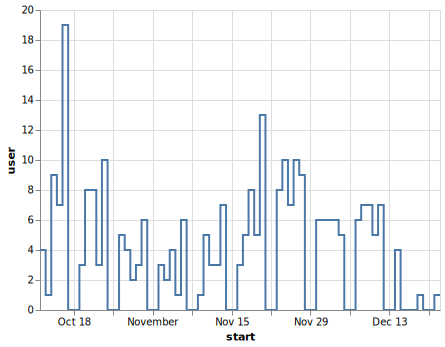

In [5]:
alt.Chart(daily_active_users).mark_line(interpolate="step-after").encode(
    x="start", y="user"
).interactive()

### How many total users?

In [6]:
user_starts_count = df.groupby("user").count()["start"].to_frame()
len(user_starts_count)

66

Statistics of total user count

In [7]:
user_starts_count.describe()

,start
count,66.000000
mean,6.060606
std,8.229177
min,1.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,46.000000


### What is the distribution of the number of times a server is started?

In [8]:
# Cutoff for extreme outliers
start_cutoff = user_starts_count.quantile(0.99)

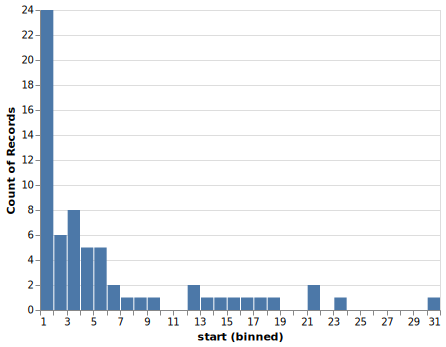

In [9]:
alt.Chart(
    user_starts_count[user_starts_count["start"] < start_cutoff["start"]]
).mark_bar().encode(
    alt.X("start", bin=alt.BinParams(step=1.0)), y="count()"
).interactive()

### What is the distribution of session lengths?
Note that these values are not exact, because idle notebooks (and therefore, ultimately, servers) are not forcibly stopped at present; the user is given a prompt only.

In [10]:
duration_cutoff = df.quantile(0.99)

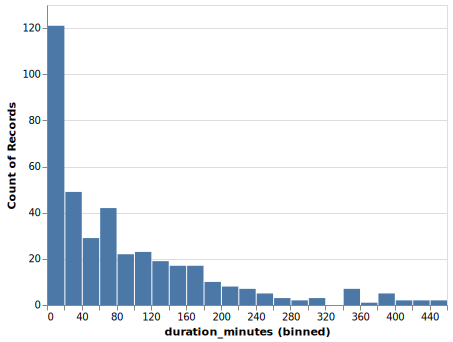

In [11]:
alt.Chart(
    df[df["duration_minutes"] < duration_cutoff["duration_minutes"]]
).mark_bar().encode(
    alt.X("duration_minutes", bin=alt.BinParams(maxbins=30)), y="count()"
).interactive()

## How many servers were running in parallel?

Here we'll un-pivot our dataframe (see [this link](https://jalammar.github.io/visualizing-pandas-pivoting-and-reshaping/)) to produce an `event` column

In [12]:
server_events = df.melt(
    var_name="event", value_name="time", value_vars=["start", "stop"]
).sort_values("time")

In [13]:
concurrent = server_events.event.map({"start": 1, "stop": -1}).cumsum()

In [14]:
sessions = server_events.assign(concurrent=concurrent)
sessions.describe()

,concurrent
count,800.000000
mean,1.940000
std,1.682242
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,9.000000


In [15]:
sessions

,event,time,concurrent
392,start,2020-10-12 07:50:16,1
792,stop,2020-10-12 07:51:04,0
350,start,2020-10-12 08:53:06,1
750,stop,2020-10-12 09:16:27,0
256,start,2020-10-12 09:47:50,1
...,...,...,...
690,stop,2020-12-21 17:53:26,0
107,start,2020-12-22 10:58:14,1
507,stop,2020-12-22 12:37:26,0
245,start,2020-12-22 18:53:36,1


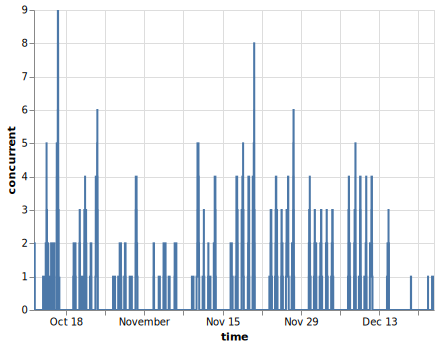

In [16]:
(
    alt.Chart(sessions)
    .mark_line(interpolate="step-after")
    .encode(x="time", y="concurrent")
    .interactive()
)

## When did server sessions run?

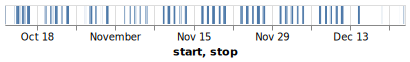

In [17]:
alt.Chart(df).mark_bar().encode(
    x="start",
    x2="stop",
).interactive()

In [18]:
data_dir = pathlib.Path("olab-analytics", "notebook-sessions")

sessions = [json.loads(p.read_text()) for p in data_dir.glob("*.json")]

df = pd.DataFrame(sessions)
df["start"] = pd.to_datetime(df["start"], unit="s")
df["stop"] = pd.to_datetime(df["stop"], unit="s")
df["duration_seconds"] = (df["stop"] - df["start"]).dt.total_seconds()
df.head()

,user,kernel_id,start,notebook,stop,duration_seconds
0,bea6a28d4d5741fc286d05323345e31264ea0a9c463881...,dd79f9d2-c910-4d8a-bcce-c77a56f709fe,2020-11-11 15:16:26,10-nai-detector.ipynb,2020-11-11 17:10:28,6842.0
1,64c6a6b1f13aa98733bfba8206088222b3a3b648e9e6dc...,e19a96c7-da14-460b-8403-209c331b6a7d,2020-11-27 17:40:47,index.ipynb,2020-11-27 17:41:02,15.0
2,bea6a28d4d5741fc286d05323345e31264ea0a9c463881...,cef7f89f-f808-4788-a966-e27d00ea73cf,2020-11-20 15:39:34,50-beta-decay.ipynb,2020-11-20 15:42:19,165.0
3,64c6a6b1f13aa98733bfba8206088222b3a3b648e9e6dc...,ff38f00c-a03f-4285-abcb-339a57bb5ad0,2020-11-26 14:09:40,50-beta-decay.ipynb,2020-11-26 14:22:38,778.0
4,a02c003c30108484b4569f8e9494ea85ad51ea00dfe23c...,7a080c7a-090c-4154-a79f-d7a998f61fae,2020-12-11 13:37:44,index.ipynb,2020-12-11 13:37:53,9.0


### How many started sessions per pod?

In [19]:
df.loc[df["duration_seconds"].idxmax()]

user                1db99d0b4052993b7e9ec229875fbd60b0f78a50cde58e...
kernel_id                        c8559e44-e1c0-48ec-8aa9-e0aaddccab7e
start                                             2020-11-13 10:42:09
notebook                                  40-neutron-activation.ipynb
stop                                              2020-11-13 20:05:43
duration_seconds                                              33814.0
Name: 1034, dtype: object

In [20]:
df.groupby("user").count()["notebook"].reset_index()

,user,notebook
0,022cd8e500f4290bd101f97fe5b1919787c7ef4157c8bb...,12
1,07aadfa1d31ad14455341c93474d00f6d2ece451b57758...,10
2,0f40bbb9fe4242f874b23b82b9da56fe1316f984864d09...,1
3,12b9b492c5f00c535b368294f8d17f9ffdc3c984787e49...,1
4,170953e9dd0d702eb10a9a5cb56881655fff724c262e0d...,10
5,17f78a54a545854e1d8e4b26dc052ce87989c4d62d3342...,6
6,1db99d0b4052993b7e9ec229875fbd60b0f78a50cde58e...,21
7,2b44734da0a9439af965be0292694e6864b397be0b10d4...,1
8,30b3f614f84c10d46fa4f1ecfb14e8ffae9f0d122d5e89...,18
9,326acdd6f8dc46c1546435c838d083feb7d53833e2ce52...,6


### How many *unique* opened notebooks per pod?

In [21]:
df.groupby("user")["notebook"].nunique().reset_index()

,user,notebook
0,022cd8e500f4290bd101f97fe5b1919787c7ef4157c8bb...,3
1,07aadfa1d31ad14455341c93474d00f6d2ece451b57758...,3
2,0f40bbb9fe4242f874b23b82b9da56fe1316f984864d09...,1
3,12b9b492c5f00c535b368294f8d17f9ffdc3c984787e49...,1
4,170953e9dd0d702eb10a9a5cb56881655fff724c262e0d...,5
5,17f78a54a545854e1d8e4b26dc052ce87989c4d62d3342...,2
6,1db99d0b4052993b7e9ec229875fbd60b0f78a50cde58e...,3
7,2b44734da0a9439af965be0292694e6864b397be0b10d4...,1
8,30b3f614f84c10d46fa4f1ecfb14e8ffae9f0d122d5e89...,4
9,326acdd6f8dc46c1546435c838d083feb7d53833e2ce52...,3


### How are the various notebooks accessed during the day

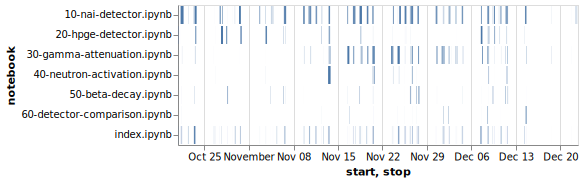

In [22]:
alt.Chart(df).mark_bar().encode(x="start", x2="stop", y="notebook").interactive()

:::{todo}
future work
:::

- methodology usage
- methodology analytics